In [1]:
from scipy.optimize import least_squares
import numpy as np
import matplotlib.pyplot as plt
import ares
from average_dTb import average_dTb
import os

In [2]:
# !python remote.py

In [3]:
sim = ares.simulations.Global21cm(radiative_transfer=False)
sim.run()

# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.

############################################################################
##                       ARES Simulation: Overview                        ##
############################################################################
## ---------------------------------------------------------------------- ##
## Source Populations                                                     ##
## ---------------------------------------------------------------------- ##
##           sfrd    sed  radio  O/IR  Lya    LW   LyC   Xray  RTE        ##
## pop #0 :  fcoll    yes    -     -     x     -     -     -     -        ##
## pop #1 : sfrd->0   yes    -     -     -     -     -     x     -        ##
## pop #2 : sfrd->0   yes    -     -     -     -     x     -     -        ##
## ---------------------------------------------------------------------- ##
## Physics                                                                ##
## -----

In [4]:
def dTb(theta, z):
    m_chi = theta[0]
    
    directory = "average_dTb/m_chi"+"{:.2f}".format(m_chi)
    if os.path.exists(directory):
        if np.size(os.listdir(directory)) < 150:
            more_random_v_stream = 150 - np.size(os.listdir(directory))
            print("{} more_random_v_streams will be generated for m_chi = {} GeV.".format(more_random_v_stream, m_chi))
        else:
            more_random_v_stream = 0
            print("Adequate files already exist for m_chi = {} GeV. No more random v_streams to be generated.".format(m_chi))
    else:
        more_random_v_stream = 150
        print("{} more random v_streams will be generated for m_chi = {} GeV.".format(more_random_v_stream, m_chi))
    
    z_array, dTb_averaged, m_chi = average_dTb(m_chi=m_chi, more_random_v_stream=more_random_v_stream, mpi=1)
    
    dTb = np.interp(z, z_array, dTb_averaged)
    return dTb

In [5]:
z_sample = np.arange(10, 300, 5)

theta_true = [0.35]
dTb_accurate = dTb(theta_true, z_sample)

noise = 0.5
dTb_sample = dTb_accurate + noise * np.random.normal(size = z_sample.shape[0])

Adequate files already exist for m_chi = 0.35 GeV. No more random v_streams to be generated.
Preprocessing 150 files of dTb for m_chi = 0.35 GeV...
150 files have been interpolated.
---------------------------------------------


(-60.0, 0.0)

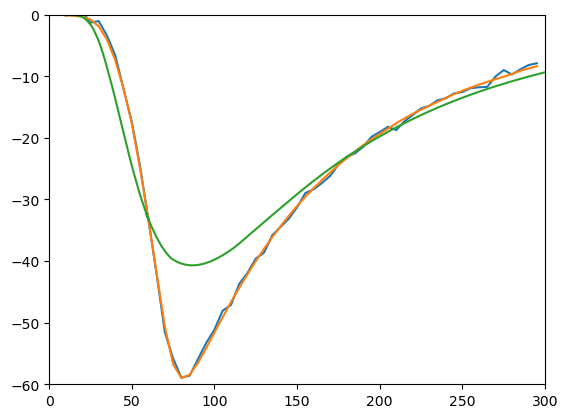

In [6]:
plt.plot(z_sample, dTb_sample)
plt.plot(z_sample, dTb_accurate)
plt.plot(sim.history['z'], sim.history['dTb'])
plt.xlim(0,300)
plt.ylim(-60,0)

In [7]:
def fun(theta):
    residual = abs(dTb(theta, z_sample) - dTb_sample)
    return residual

In [8]:
theta_guess = [0.1]
res = least_squares(fun, theta_guess, diff_step=0.1, bounds=(0, 10), xtol=1e-3)

Adequate files already exist for m_chi = 0.1 GeV. No more random v_streams to be generated.
Preprocessing 182 files of dTb for m_chi = 0.1 GeV...
182 files have been interpolated.
---------------------------------------------
Adequate files already exist for m_chi = 0.11000000000000001 GeV. No more random v_streams to be generated.
Preprocessing 150 files of dTb for m_chi = 0.11000000000000001 GeV...
150 files have been interpolated.
---------------------------------------------
79 more_random_v_streams will be generated for m_chi = 0.15543320539071603 GeV.
dark_matter_mass = 0.15543320539071603 GeV
8 cores working...
pid = 8162, initial_v_stream = 22475.47506166919 m/s
pid = 8165, initial_v_stream = 9243.468564999865 m/s
pid = 8161, initial_v_stream = 24704.7532711329 m/s
pid = 8164, initial_v_stream = 28326.547458380566 m/s
pid = 8163, initial_v_stream = 22387.439508773132 m/s
pid = 8166, initial_v_stream = 24255.46521508738 m/s
pid = 8167, initial_v_stream = 22207.769724242113 m/s
p

/home/xia/anaconda3/lib/python3.9/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,



pid = 8166, initial_v_stream = 29411.14256648577 m/s
pid = 8168, initial_v_stream = 22113.87001450761 m/s
pid = 8163, initial_v_stream = 20561.20725816989 m/s
pid = 8161, initial_v_stream = 27381.108175978556 m/s
pid = 8165, initial_v_stream = 11745.011805764627 m/s
pid = 8167, initial_v_stream = 14936.281577019752 m/s
pid = 8162, initial_v_stream = 14997.62344907271 m/s

In [ ]:
print(res.success)
print(res.status)

True
1


In [ ]:
res.x

array([0.01])

Adequate files already exist for m_chi = 0.01 GeV. No more random v_streams to be generated.
Preprocessing 150 files of dTb for m_chi = 0.01 GeV...
150 files have been interpolated.
---------------------------------------------


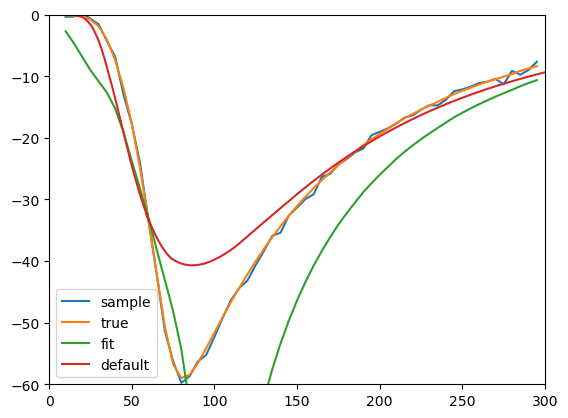

In [ ]:
plt.plot(z_sample, dTb_sample, label='sample')
plt.plot(z_sample, dTb_accurate, label = 'true')
plt.plot(z_sample, dTb(res.x, z_sample), label = 'fit')
plt.plot(sim.history['z'], sim.history['dTb'], label = 'default')
plt.xlim(0,300)
plt.ylim(-60,0)
plt.legend()

In [ ]:
plt.plot(z_sample, dTb_sample, label='sample')
plt.plot(z_sample, dTb_accurate, label = 'true')
plt.plot(z_sample, dTb([0.40], z_sample), label = 'fit')
# plt.plot(sim.history['z'], sim.history['dTb'], label = 'default')
plt.xlim(0,300)
plt.ylim(-60,0)
plt.legend()

In [ ]:
# plt.plot(z_sample, dTb_sample, label='sample')
# plt.plot(z_sample, dTb_accurate, label = 'true')
plt.figure(dpi=300)
z_sample = np.arange(10, 300, 5)
# plt.plot(z_sample, dTb([0.59], z_sample), label = '59')
plt.plot(z_sample, dTb([0.55], z_sample), label = '55')
plt.plot(z_sample, dTb([0.57], z_sample), label = '57')
plt.plot(z_sample, dTb([0.59], z_sample), label = '59')
# plt.plot(sim.history['z'], sim.history['dTb'], label = 'default')
plt.xlim(0,300)
plt.ylim(-60,0)
plt.legend()

136 more_random_v_streams will be generated for m_chi = 0.55 GeV.
dark_matter_mass = 0.55 GeV
initial_v_stream = 40056.08197639586 m/s

/usr/local/pace-apps/manual/packages/anaconda3/2022.05/lib/python3.9/site-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,



initial_v_stream = 2.3161696879510877e+04 m/s
initial_v_stream = 2.6399741865664782e+04 m/s
initial_v_stream = 2.2351595800868352e+04 m/s
initial_v_stream = 1.6901936996939297e+04 m/s
initial_v_stream = 1.1120796380308999e+04 m/s
initial_v_stream = 1.4528398394095593e+04 m/s
initial_v_stream = 2.6336955900978748e+04 m/s
initial_v_stream = 4.128159570500891e+04 m/s
initial_v_stream = 3.020272184909218e+04 m/s
initial_v_stream = 3.2547610023199286e+04 m/s
initial_v_stream = 1.6059844021282654e+04 m/s
initial_v_stream = 3.405520097718784e+04 m/s
initial_v_stream = 2.1148058350180636e+04 m/s
initial_v_stream = 2.3257489489427295e+04 m/s
initial_v_stream = 3.629629161068925e+04 m/s
initial_v_stream = 3.343129657976316e+04 m/s
initial_v_stream = 3.2010255483280158e+04 m/s
initial_v_stream = 7.376273080777645e+03 m/s
initial_v_stream = 2.1032427305793113e+04 m/s
initial_v_stream = 2.5995140512178794e+04 m/s
initial_v_stream = 8.968863893924836e+03 m/s
initial_v_stream = 2.16005553071537e+04 